<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [864]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie Numpy
import numpy as np

In [865]:
#Importation de la librairie plotly express
import plotly.express as px
#Importation de la librairie matplotlib
import matplotlib.pyplot as plt  
#Importation de la librairie seaborn
import seaborn as sns

In [866]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

pd.set_option('display.max_columns', None)
  #pd.options.display.max_columns = None
  #This will allow you to see all column names & rows when you are doing .head(). None of the column name will be truncated.

#If you just want to see the column names you can do:
#print(df.columns.tolist())

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [868]:
#Importation du fichier web.csv
df_web = pd.read_csv("web.csv")
#Importation du fichier erp.csv
df_erp = pd.read_csv("erp.csv")
#importation du fichier liaison.csv
df_liaison = pd.read_csv("liaison.csv")


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [871]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [872]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
 5   purchase_price  825 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.8+ KB


Il n'y a aucune valeurs manquantes sur le dataset 'erp'.
Dans les colonnes *'price'* et *'purchase_price'*, les valeurs ne sont pas reconnues comme numériques.

In [874]:
#Conversion des colonnes 'price' et 'purchase_price' en type float (Elodie)
df_erp['price'] = df_erp['price'].str.replace(',','.').astype(float)
df_erp['purchase_price'] = df_erp['purchase_price'].str.replace(',','.').astype(float)


In [875]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [876]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp['product_id'].duplicated().sum()


0

Il n'y a aucune valeurs doublons dans la colonne 'product_id'

In [878]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()

#À quelle(s) autre(s) colonne(s) sont-elles liées ?

array(['instock', 'outofstock'], dtype=object)

La variable 'stock_status' est lié à la variable 'stock_quantity'.

In [880]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = np.where(df_erp['stock_quantity'] <= 0, 'outofstock', 'instock')
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [881]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [882]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).value_counts()


True     823
False      2
Name: count, dtype: int64

Il y a 2 lignes  non identiques entre les valeurs de la colonne "stock_status" et "stock_status_2".

In [884]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

df_erp.loc[df_erp['stock_status'] != df_erp["stock_status_2"],:]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


On a une erreur de calcul sur la 1ère ligne car il y a 3 articles en stock mais son état affiche en 'rupture de stock'.
A l'inverse, on a un produit en rupture de stock mais l'état de stock affiche 'en stock'.

In [886]:
#Corriger la ou les données incohérentes
df_erp['stock_status'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

#Verification en utilisant le même code que plus haut pour afficher les problemes
print(df_erp.loc[df_erp['stock_status'] != df_erp["stock_status_2"],:])

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []


Il n'y a plus d'erreur de calcul.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [890]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull().sum()))

#Afficher le prix minimum de la colonne "price"
print('Le prix minimum est de {}€'.format(df_erp['price'].min()))

#Afficher le prix maximum de la colonne "price"
print('Le prix maximum est de {}€'.format(df_erp['price'].max()))

#Afficher les prix inférieurs à 0 (qu'est ce qu'il faut en faire)
df_erp.loc[df_erp['price'] < 0,:] 

Nombres d'article avec un prix non renseignés: 0
Le prix minimum est de -20.0€
Le prix maximum est de 225.0€


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


Les prix de vente négatifs sont incohérents. Je garde les 2 premières lignes qui ne sont pas vendus sur le site et qui n'ont aucun stock (ils n'auront pas d'impact sur l'analyse des ventes ou des stocks).
Je garde le prix négatif pour le produit à la dernière ligne car il y a des quantités en stock qui peuvent être vendus et c'est le seul prix de vente négatif.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [893]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("La quantité minimum est {}pcs".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("La quantité maximum est {}pcs".format(df_erp['stock_quantity'].max()))
#Afficher les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp.loc[df_erp['stock_quantity'] < 0,:]

La quantité minimum est -10pcs
La quantité maximum est 145pcs


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


Je garde les stocks négatifs. C'est un indicateur pour effectuer un réapprovisionnement sur le produit en vente sur le site.

In [895]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(columns=['stock_status_2'], inplace=True)
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48
821,7204,0,45.0,9,instock,24.18
822,7247,1,54.8,6,instock,27.18
823,7329,0,26.5,14,instock,13.42


In [896]:
#Quelles sont les colonnes à conserver selon vous?
 #Les colonnes à conserver sont: 'product_id','onsale_web', 'price','stock_quantity' (Elodie) 

J'ai supprimé la colonne 'stock_status' car c'est une colonne qui est redondante avec la colonne 'stock_quantity'. Elles donnent les même informations.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [899]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()

array([1, 0], dtype=int64)

Ce sont des valeurs de type booléen:
1 signifie produit en vente sur le site
et 0 signifie produit non en vente sur le site.

In [901]:
#Nombre de produits vendus sur le site e-commerce par l'entreprise
print("Il y a {} produits vendus sur le site e-commerce".format(df_erp[df_erp['onsale_web'] == 1].shape[0]))

Il y a 716 produits vendus sur le site e-commerce


In [902]:
#Nombre de produits non vendus sur le site e-commerce par l'entreprise
print("Il y a {} produits qui ne sont pas vendus sur le site e-commerce".format(df_erp[df_erp['onsale_web'] == 0].shape[0]))

Il y a 109 produits qui ne sont pas vendus sur le site e-commerce


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [904]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print('Il y a {} valeurs manquantes dans la colonne purchase_price'.format(df_erp['purchase_price'].isnull().sum()))
#Afficher le prix minimum et maximum de la colonne "purchase_price"
df_erp[['purchase_price']].describe()


Il y a 0 valeurs manquantes dans la colonne purchase_price


,purchase_price
count,825.000000
mean,16.940582
std,14.561840
min,2.740000
25%,7.590000
50%,12.710000
75%,22.020000
max,137.810000


Le prix d'achat minimum est de 2.74€. Le prix d'achat maximum est de 137.81€

In [906]:
#Suppression de la colonne 'stock_status'
df_erp.drop(columns=(['stock_status']),inplace=True)
df_erp.head(2)

,product_id,onsale_web,price,stock_quantity,purchase_price
0,3847,1,24.2,16,12.88
1,3849,1,34.3,10,17.54


In [907]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 32.4 KB


Le nouveau dataset après nettoyage et traitement des données

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [910]:
#Dimension du dataset
#Nombre d'observations
print('Il ya {} observations'.format(df_web.shape[0]))
#Nombre de caractéristiques
print('Il ya {} colonnes'.format(df_web.shape[1]))

Il ya 1513 observations
Il ya 29 colonnes


In [911]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  product_type           1429 non-null   object 
 13  post_title             1430 non-null   object 
 14  post_excerpt           716 non-null    object 
 15  post

#Selon vous, quelles sont les colonnes à conserver ?

 0   sku                 
 1   total_sales        
 2   tax_status          
 3   post_date_gmt     
 4   product_type       
 5   post_title         
 6   post_status        
 7   post_modified_gmt

Ce sont des colonnes avec des données renseignées ou contenant des informations pertinentes autour des ventes et des produits.

In [914]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web.drop(columns=
 (['virtual','downloadable','rating_count','average_rating','tax_class','post_date','post_modified','post_author',
  'post_content','post_name','post_password','post_excerpt','post_content_filtered','post_parent','guid','post_type','menu_order',
  'post_mime_type','ping_status','comment_status','comment_count']),inplace=True)
df_web.head(2)

,sku,total_sales,tax_status,post_date_gmt,product_type,post_title,post_status,post_modified_gmt
0,11862,3.0,NaN,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,publish,2019-01-31 11:12:56
1,16057,5.0,NaN,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,publish,2020-07-07 08:05:02


Les colonnes ont été supprimées 
soit pour respecter le RGPD,
soit parce qu'elles ne contenaient aucune valeurs,
soit elles ne contenaient que des valeurs égale à 0.

In [916]:
#Identifier les lignes sans code articles
print('Il ya {} observations sans code article dans le fichier web'.format(df_web['sku'].isnull().sum()))

Il ya 85 observations sans code article dans le fichier web


In [917]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web[['sku']].dtypes

sku    object
dtype: object

In [918]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web['sku'].str.isdigit().value_counts()

sku
True     1424
False       4
Name: count, dtype: int64

Il y aurait 4 codes SKU qui ne sont pas de type numérique.

In [920]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_faux_sku = df_web[df_web['sku'].apply(lambda x: not str(x).isdigit())]
print(df_faux_sku['sku'].unique())

[nan '13127-1' 'bon-cadeau-25-euros']


Je garde les codes articles qui ne respectent pas la règle de codification.

In [922]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
print('Il y a {} clé en doublons'.format(df_web['sku'].duplicated().sum()))

Il y a 798 clé en doublons


In [923]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_web = df_web[df_web['sku'].notnull()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur renseigner dans chacune des colonnes
df_web .info()
#3 - Que constatez-vous?

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0 to 1512
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                1428 non-null   object 
 1   total_sales        1428 non-null   float64
 2   tax_status         714 non-null    object 
 3   post_date_gmt      1428 non-null   object 
 4   product_type       1427 non-null   object 
 5   post_title         1428 non-null   object 
 6   post_status        1428 non-null   object 
 7   post_modified_gmt  1428 non-null   object 
dtypes: float64(1), object(7)
memory usage: 100.4+ KB


La majorité des colonnes ont des valeurs

In [925]:
#Suppression des doublons
df_web.drop_duplicates(subset=['sku'],keep='first',inplace=True)
df_web.head()

,sku,total_sales,tax_status,post_date_gmt,product_type,post_title,post_status,post_modified_gmt
0,11862,3.0,NaN,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,publish,2019-01-31 11:12:56
1,16057,5.0,NaN,2018-04-17 13:29:17,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,publish,2020-07-07 08:05:02
2,14692,5.0,taxable,2019-03-19 09:06:47,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,publish,2020-04-25 19:40:31
3,16295,14.0,NaN,2018-02-15 13:05:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,publish,2020-08-27 16:55:03
4,15328,2.0,taxable,2019-03-27 17:05:09,Vin,Agnès Levet Côte Rôtie Maestria 2017,publish,2020-07-25 13:45:02


In [926]:
#Afficher le nouveau dataframe (Elodie)
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 1391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                714 non-null    object 
 1   total_sales        714 non-null    float64
 2   tax_status         361 non-null    object 
 3   post_date_gmt      714 non-null    object 
 4   product_type       714 non-null    object 
 5   post_title         714 non-null    object 
 6   post_status        714 non-null    object 
 7   post_modified_gmt  714 non-null    object 
dtypes: float64(1), object(7)
memory usage: 50.2+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [928]:
#Dimension du dataset
#Nombre d'observations
print('Il y a {} observations dans le fichier liaison'.format(df_liaison.shape[0]))
#Nombre de caractéristiques
print('Il y a {} colonnes dans le fichier liaison'.format(df_liaison.shape[1]))

Il y a 825 observations dans le fichier liaison
Il y a 2 colonnes dans le fichier liaison


In [929]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Il y a des valeurs manquantes dans la colonne 'id_web' du fichier liaison

In [931]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print ('Il y a {} doublons dans la colonne "product id"'.format(df_liaison['product_id'].duplicated().sum()))

Il y a 0 doublons dans la colonne "product id"


In [932]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison[df_liaison["id_web"].notnull()]["id_web"].unique().size

734

Il y a 734 valeurs uniques pour la colonne 'id_web' dans le fichier liaison.

In [934]:
#Avons-nous des articles sans correspondances?
df_liaison['id_web'].isnull().sum()

91

Il y a 91 articles sans correspondances dans le fichier liaison.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [938]:
#Fusion des fichiers df_erp et df_liaison
df_merge= pd.merge(df_liaison,df_erp, on='product_id', how='outer')
df_merge

,id_web,product_id,onsale_web,price,stock_quantity,purchase_price
0,15298,3847,1,24.2,16,12.88
1,15296,3849,1,34.3,10,17.54
2,15300,3850,1,20.8,0,10.64
3,19814,4032,1,14.1,26,6.92
4,19815,4039,1,46.0,3,23.77
...,...,...,...,...,...,...
820,NaN,7203,0,45.0,30,23.48
821,NaN,7204,0,45.0,9,24.18
822,13127-1,7247,1,54.8,6,27.18
823,14680-1,7329,0,26.5,14,13.42


In [939]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.isnull().sum()

id_web            91
product_id         0
onsale_web         0
price              0
stock_quantity     0
purchase_price     0
dtype: int64

Il y a des lignes sans correspondances. 
Il se pourrait qu'il y est des produits vendus sur le site qui ne sont pas référencés dans l'ERP de l'entreprise.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [942]:
#Fusionnez les datasets df_merge et df_web
df_merge= pd.merge(df_merge, df_web, left_on='id_web', right_on= 'sku', how='outer')
df_merge

,id_web,product_id,onsale_web,price,stock_quantity,purchase_price,sku,total_sales,tax_status,post_date_gmt,product_type,post_title,post_status,post_modified_gmt
0,10014,5913,1,36.0,7,17.16,10014,10.0,taxable,2019-04-04 13:45:23,Gin,Darnley's London Dry Gin Original,publish,2020-08-26 13:55:02
1,10459,4617,1,67.5,6,35.57,10459,4.0,taxable,2018-04-13 13:58:19,Vin,Alphonse Mellot Sancerre Rouge Génération XIX ...,publish,2020-08-24 12:05:02
2,10775,4709,1,44.0,7,22.05,10775,6.0,taxable,2018-04-17 19:28:52,Vin,Albert Mann Pinot Gris Vendanges Tardives Alte...,publish,2018-12-22 09:30:02
3,10814,4656,1,43.0,13,22.88,10814,7.0,NaN,2018-04-17 08:12:40,Vin,Thierry Germain Saumur-Champigny Outre Terre 2013,publish,2020-08-05 12:35:02
4,11049,4619,1,59.0,8,32.01,11049,4.0,taxable,2018-04-13 14:07:49,Vin,Alphonse Mellot Sancerre Rouge En Grands Champ...,publish,2020-01-31 08:30:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,7196,0,31.0,55,31.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,NaN,7200,0,31.0,6,15.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,NaN,7201,0,31.0,18,16.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,NaN,7203,0,45.0,30,23.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [943]:
#Avons-nous des lignes sans correspondances?
df_merge.isnull().sum()

id_web                91
product_id             0
onsale_web             0
price                  0
stock_quantity         0
purchase_price         0
sku                  111
total_sales          111
tax_status           464
post_date_gmt        111
product_type         111
post_title           111
post_status          111
post_modified_gmt    111
dtype: int64

Il y a des lignes sans correspondances.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [947]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_merge.boxplot(column=['price'])

<Axes: >

In [948]:
#Autre méthode avec plotly express
px.box(df_merge,
       x='price',
       labels={'price':'Prix de Vente en Euros'},
       title= "Boxplot des prix de vente au mois d'octobre")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [951]:
#Calculer la moyenne du prix
df_merge['price'].mean()
print("La moyenne des prix de vente est de {}€".format(round(df_merge['price'].mean(),2)))
#Calculer l'écart-type du prix
df_merge['price'].std()
print("L'écart-type des prix de vente est de {}".format(round(df_merge['price'].std(),2)))
#Calculer le Z-score
df_merge['Z_score'] = round((df_merge['price'] - df_merge['price'].mean(skipna=True))/df_merge['price'].std(),2)

La moyenne des prix de vente est de 32.19€
L'écart-type des prix de vente est de 26.71


In [952]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_merge.loc[df_merge['Z_score'] > 3,]['price'].min()
print("Pour un Z-score supérieur à 3,Le seuil minimun du prix est de {}€".
      format(df_merge.loc[df_merge['Z_score'] > 3,]['price'].min()))

Pour un Z-score supérieur à 3,Le seuil minimun du prix est de 114.0€


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [954]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,Z_score
count,825.000000,825.000000,825.000000,825.000000,825.000000,714.000000,825.000000
mean,5162.597576,0.867879,32.187697,21.589091,16.940582,8.516807,0.000352
std,902.644635,0.338828,26.712077,21.933807,14.561840,8.151639,1.000009
min,3847.000000,0.000000,-20.000000,-10.000000,2.740000,0.000000,-1.950000
25%,4348.000000,1.000000,14.500000,7.000000,7.590000,5.000000,-0.660000
50%,4907.000000,1.000000,24.300000,18.000000,12.710000,8.000000,-0.300000
75%,5805.000000,1.000000,42.000000,30.000000,22.020000,11.000000,0.370000
max,7338.000000,1.000000,225.000000,145.000000,137.810000,122.000000,7.220000


In [955]:
#Définissez un seuil pour les articles "outliers" en prix

#Calcul du 1er quantile (Elodie)
Q1 = df_merge['price'].quantile(0.25)
print("25% des prix de vente sont en dessous de {}€".format(round(Q1,2)))

#Calcul du 3ème quantile (Elodie)
Q3 = df_merge['price'].quantile(0.75)
print("75% des prix de vente sont en dessous de {}€".format(round(Q3,2)))

#Calcul de l'intervalle interquartile (Elodie)
IQR = Q3 - Q1
print("L'intervalle interquartile est de {}".format(round(IQR,2)))

#Seuil du prix inférieur
Seuil_prix_inf = Q1 -1.5 * IQR
print("Le seuil du prix inférieur est de {}€".format(round(Seuil_prix_inf,2)))  #Le seuil du prix est de 0€.

#Seuil du prix supérieur
Seuil_prix_sup = Q3 +1.5 * IQR
print("Le seuil du prix supérieur est de {}€".format(round(Seuil_prix_sup,2)))


25% des prix de vente sont en dessous de 14.5€
75% des prix de vente sont en dessous de 42.0€
L'intervalle interquartile est de 27.5
Le seuil du prix inférieur est de -26.75€
Le seuil du prix supérieur est de 83.25€


Donc tous les produits ayant des prix au dessus de 83.1€ et en dessous de -26.5€ seront considérés comme des valeurs outliers.

In [957]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

#Dataframe des prix outliers inférieurs et supérieurs (Elodie)
outliers = df_merge[(df_merge['price'] < Seuil_prix_inf) | (df_merge['price'] > Seuil_prix_sup)]

#Afficher le nombre d'articles du catalogue "outliers" (Elodie)

print("Il y a {} articles 'outliers'".format(outliers['product_id'].shape[0]))

#la proportion de l'ensemble du catalogue "outliers"
print("La proportion des articles 'outliers' est de {}% sur le total des articles".
      format(round(outliers['product_id'].shape[0]/df_merge['product_id'].shape[0]*100,2)))

Il y a 36 articles 'outliers'
La proportion des articles 'outliers' est de 4.36% sur le total des articles


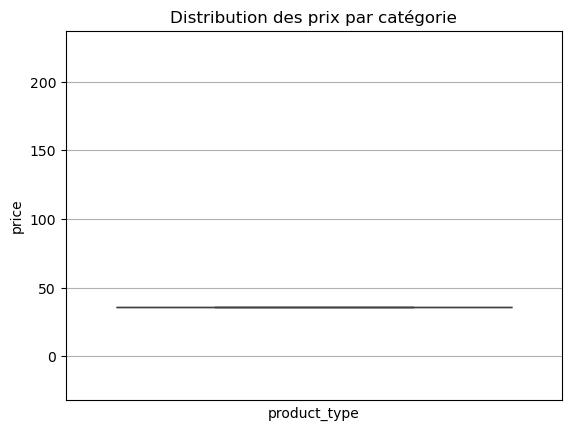

In [958]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

sns.boxplot(df_merge,
            x=df_merge['product_type'],
            y=df_merge['price'])

plt.xticks(rotation=45)
plt.title("Distribution des prix par catégorie")
plt.show()

Il y a beaucoup de valeurs extrêmes dans les prix des vins, des champagnes et des whiskys.
Selon moi, ce sont des valeurs justifiées car cela peut correspondre à des spiritueux de haute-qualité ou d'une rareté sur le marché. Pour les vins proposés, il doit y avoir une majorité de vins bon marché et plusieurs vins plus prestigeux de qualité supérieure.

Pour la catégorie 'Autre', nous ne savons pas de quel produit il s'agit et nous n'avons pas assez de données.

In [960]:
#Analyse des ventes pour les spiritieux dont les prix sont des "valeurs extrêmes"
outliers.groupby(['product_type','price'])[['total_sales']].sum()

total_sales
product_type price             
Champagne    85.6           7.0
             86.8           9.0
             112.0          6.0
             135.0          5.0
             191.3          6.0
             225.0         11.0
Cognac       104.0          5.0
             108.5          4.0
             157.0          4.0
             176.0          3.0
Vin          83.7           2.0
             88.4           5.0
             92.0           1.0
             99.0           6.0
             100.0          1.0
             102.3          2.0
             105.0         10.0
             105.6          6.0
             109.6          1.0
             115.0         11.0
             116.4          5.0
             121.0          5.0
             124.8          1.0
             137.0          3.0
             175.0          4.0
             217.5          2.0
Whisky       93.0           1.0
             114.0          3.0
             122.0          3.0

On remarque qu'il y a des ventes sur des prix considérés comme 'outliers' pour chaque catégorie de produit. 
Il y a eu 11 ventes sur le produit le plus cher du catalogue. Donc ce ne sont pas des prix aberrants pour les clients sachant que l'entreprise a un positionnement haut de gamme. 

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [964]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge['CA']= df_merge['price'] * df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
print("Le CA du mois d'octobre est de {}€".format(round(df_merge['CA'].sum(),2)))


Le CA du mois d'octobre est de 153748.1€


In [965]:
#Calcul du chiffre d'affaires par catégorie de produit
CA_par_catégorie = df_merge.groupby(['product_type']) [['CA']].sum().reset_index()
CA_par_catégorie

,product_type,CA
0,Autre,175.0
1,Champagne,19418.6
2,Cognac,3170.2
3,Gin,504.0
4,Huile d'olive,497.7
5,Vin,127096.0
6,Whisky,2886.6


In [966]:
#Graphique représentant le CA par catégorie de produit
px.bar(CA_par_catégorie.sort_values(by='CA',ascending= False),
       x= 'product_type',
       y='CA',
       title="Chiffre d'affaires par catégorie de produit au mois d'octobre")

In [967]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values(by=['CA'], ascending=False, inplace=True)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
Top_20_CA = df_merge.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(df_merge[:20][::-1] ,
       y= 'post_title' , 
       x= "CA",
       orientation = 'h',
       title= "Top 20 des articles par Chiffre d'affaires en Octobre",
       labels={'post_title':'Articles','CA':"Chiffres d'Affaires (€)"}, height=470) 

In [968]:
# Afficher le prix de vente et les ventes de l'article ayant le plus gros chiffre d'affaire
Top_20_CA.loc[Top_20_CA['post_title'].isin
(['Champagne Mailly Grand Cru Intemporelle 2010','Champagne Egly-Ouriet Grand Cru Millésimé 2008']),
['post_title','price','total_sales']]

,post_title,price,total_sales
0,Champagne Mailly Grand Cru Intemporelle 2010,59.0,116.0
1,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,11.0


Quand on observe les 2 produits qui ont apporté le plus de chiffre d'affaires, le 1er article qui est moins cher a largement plus de ventes que le produit le plus cher du catalogue. Par conséquent, plus un article est abordable plus il y a de ventes et plus un article est cher, moins il y a de ventes.

In [970]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['CA_cumulé'] = df_merge['CA'].cumsum()
df_merge['Proportion_CA_cumulé'] = df_merge['CA_cumulé'] / df_merge['CA'].sum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
Nb_articles_80_CA = df_merge.loc[df_merge['Proportion_CA_cumulé']<= 0.8,:].shape[0]
print("{} articles représentent 80% du CA".format(Nb_articles_80_CA))

Total_articles = df_merge.shape[0]  #Nb total d'articles

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Ces articles représentent {}% de l'offre ".format(
    round((Nb_articles_80_CA/Total_articles)*100,2)))

420 articles représentent 80% du CA
Ces articles représentent 50.91% de l'offre 


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [972]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales',ascending=False, inplace=True)

#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
Top_20_quantite = df_merge.head(20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(df_merge[:20][::-1],
       y='post_title',
       x= 'total_sales',
       title= "Top 20 des articles par quantités au mois d'Octobre",
       labels={'post_title':'Articles','total_sales':'Quantités (pcs)'}, height=500)


In [973]:
#Afficher les prix de vente et les ventes des 3 articles les plus vendus en quantité.
Top_20_quantite.loc[Top_20_quantite['post_title'].isin
(['François Baur Pinot Noir Schlittweg 2017','Champagne Mailly Grand Cru Intemporelle 2010',"Argentine Mendoza Alamos Torrontes 2017"]), 
['post_title','price','total_sales']]

,post_title,price,total_sales
0,François Baur Pinot Noir Schlittweg 2017,12.7,122.0
1,Champagne Mailly Grand Cru Intemporelle 2010,59.0,116.0
2,Argentine Mendoza Alamos Torrontes 2017,11.1,111.0


Dans le top 3 des produits les plus vendus en quantité, on observe que ce sont les produits à petit prix qui se vendent le plus.

In [975]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['total_sales_cumulé'] = df_merge['total_sales'].cumsum()
df_merge['total_sales_cumulé_%'] = df_merge['total_sales_cumulé'] / df_merge['total_sales'].sum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_merge.loc[df_merge['total_sales_cumulé_%'] <= 0.8,:].shape[0]
print("{} articles représentent 80% des ventes en quantités".format(df_merge.loc[df_merge['total_sales_cumulé_%'] <= 0.8,:].shape[0]))

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("{}% des articles du catalogue représentent 80% des ventes en quantité".format
      (round((df_merge.loc[df_merge['total_sales_cumulé_%'] <= 0.8,:].shape[0] /df_merge.shape[0])*100,2)))

424 articles représentent 80% des ventes en quantités
51.39% des articles du catalogue représentent 80% des ventes en quantité


Cela démontre que l'offre est équilibrée. Plus de la moitié des produits vendus contribuent à la performance commerciale de l'entreprise en volume et en valeur.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [978]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Création de la colonne Rotation de stock
df_merge['rotation_stock'] = df_merge['stock_quantity']/df_merge['total_sales']

#Remplacement des "inf" par 0
df_merge['rotation_stock'] = round(df_merge['rotation_stock'].replace([np.inf, -np.inf, np.nan], 0),2)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
flop_20_stock_mois = df_merge.sort_values(by= ['rotation_stock'],ascending=False).head(20)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
px.bar(flop_20_stock_mois[::-1],
       x= 'rotation_stock',
       y= 'post_title',
       width=1100,
       height= 600,
       title= "Flop 20 des produits qui ont le plus de mois de stock",
       labels={'post_title':'Articles','rotation_stock':'Nombre de mois de stock'})

Les produits qui ne s'écoulent pas rapidement peuvent rester plus d'1 an et demie en stock. Ce qui est un signe d'une mauvaise gestion de stock. 
L'objectif serait de prioriser l'écoulement des stocks au plus vite et d'en analyser les raisons pour mieux optimiser la gestion des stocks.

In [980]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge['valorisation_stock'] = round(df_merge['stock_quantity'] * df_merge['price'],2)

#Calculer la somme de la colonne "Valorisation_stock_euros"
print("La valeur du stock est de {}€".format(df_merge['valorisation_stock'].sum()))

La valeur du stock est de 531628.8€


La valorisation des stocks est beaucoup trop importante. C'est du capital immobilisé qui aurait pu se convertir en chiffre d'affaires.
Donc l'action à mener est d'améliorer l'action marketing /commerciale pour déclencher l'acte d'achat auprès des clients ou prospecter de nouveaux clients et ainsi augmenter le chiffre d'affaires.

In [982]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("Il y a {} produits en stock".format(df_merge['stock_quantity'].sum()))

Il y a 17811 produits en stock


Le volume de stock paraît faible comparé à la forte valeur des stocks (531628.80€). Donc il semblerait que la plupart des produits en stock sont des produits de forte valeur.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [985]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge['Prix_HT'] = round(df_merge['price']/ 1.20,2)
#Création de la colonne Taux de marge
df_merge['Taux_de_marge'] = round((df_merge['Prix_HT'] - df_merge['purchase_price'])/df_merge['Prix_HT'],2)

#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge minimum est de {}".format(df_merge['Taux_de_marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge maximum est de {}".format(df_merge['Taux_de_marge'].max()))


Le taux de marge minimum est de -6.35
Le taux de marge maximum est de 1.65


In [986]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge[df_merge['Taux_de_marge']<0]

,id_web,product_id,onsale_web,price,stock_quantity,purchase_price,sku,total_sales,tax_status,post_date_gmt,product_type,post_title,post_status,post_modified_gmt,Z_score,CA,CA_cumulé,Proportion_CA_cumulé,total_sales_cumulé,total_sales_cumulé_%,rotation_stock,valorisation_stock,Prix_HT,Taux_de_marge
691,12589,4355,1,12.65,97,77.48,12589,0.0,taxable,2018-03-02 09:46:10,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,publish,2020-08-13 08:15:02,-0.73,0.0,153748.1,1.0,6081.0,1.0,0.0,1227.05,10.54,-6.35
727,15154,4864,0,8.30,0,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.89,NaN,NaN,NaN,NaN,NaN,0.0,0.00,6.92,-0.44
770,NaN,6324,0,92.00,18,99.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.24,NaN,NaN,NaN,NaN,NaN,0.0,1656.00,76.67,-0.29
820,NaN,7196,0,31.00,55,31.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.04,NaN,NaN,NaN,NaN,NaN,0.0,1705.00,25.83,-0.21


On observe que les produits, dont le taux de marge est négatif, sont des produits où le prix de vente est inférieur au prix d'achat.
Il y a une erreur lors de la fixation des prix de vente.

In [988]:
#création d'un dataframe avec les taux positifs
df_merge_tx_marge_positif = df_merge[df_merge['Taux_de_marge']>=0]
#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge positif minimum est de {}".format(df_merge_tx_marge_positif['Taux_de_marge'].min()))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge positif maximum est de {}".format(df_merge_tx_marge_positif['Taux_de_marge'].max()))

Le taux de marge positif minimum est de 0.23
Le taux de marge positif maximum est de 1.65


In [989]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_merge_tx_marge_positif.groupby(['product_type'])[['Taux_de_marge']].mean().reset_index()

#Affichage dans un graphique du taux de marge par type de produit
px.bar(df_merge_tx_marge_positif.groupby(['product_type'])[['Taux_de_marge']].mean()
       .reset_index().sort_values(by='Taux_de_marge',ascending=False),
       x= 'product_type',     
       y= 'Taux_de_marge',     
       title = "Taux de marge moyen par type de produit",  
       labels= {'product_type':'Catégorie de produit','Taux_de_marge':'Taux de marge moyen'})

Le cognac, le whisky ou le gin génèrent plus de gains par rapport à leur prix de vente. Ce sont des produits onéreux à l'achat donc le prix de vente sera plus élevé pour avoir une marge bénéficiaire et assurer la pérennité de l'entreprise.
Ces produits ont une valeur perçue forte ce qui peut justifié un prix plus cher et donc plus de flexible sur la marge.

Par contre, comme vu précédemment, ces 3 catégories de produit ne génèrent pas de chiffre d'affaires car les ventes ne suivent pas.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

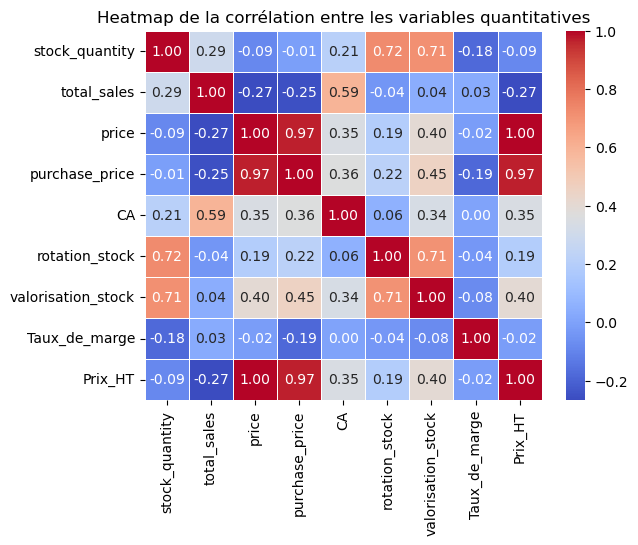

<Figure size 800x600 with 0 Axes>

In [992]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

#Calcul la matrice de corrélation
df_merge_correlation = df_merge[['stock_quantity','total_sales','price',
                                 'purchase_price','CA','rotation_stock',
                                 'valorisation_stock','Taux_de_marge', 'Prix_HT']].corr()

plt.title("Heatmap de la corrélation entre les variables quantitatives")
sns.heatmap(df_merge_correlation,
           annot=True, 
           fmt=".2f",
           cmap = 'coolwarm',
           linewidths=0.5)

plt.figure(figsize=(8,6))
plt.show()

In [993]:
#Que peut-on conclure des correlations ?


--> Il y a une forte corrélation positive entre le prix de vente et le prix d'achat (0.97): Plus un article est cher à l'achat, plus son prix de vente sera cher car l'entreprise applique une marge pour dégager des bénéfices.

--> Il y a une corrélation négative entre le prix de vente et les quantités vendues (-0.27) : Moins le prix de vente est élevé, plus il y a de quantités vendues. Donc les produits les moins chers se vendent plus en terme de quantités. Et ce sont des produits achetés moins cher par l'entreprise. 

--> Il y a une corrélation positive assez forte entre la quantité en stock et la valorisation en stock  (0.71): Plus la quantité en stock est importante et par conséquent plus la valeur des stocks l'est aussi. De la même façon que plus le renouvellement de stock est fréquent et plus la quantité en stock est forte (0.72).

Dans nos données provenant de l'ERP, à part le prix d'achat, nous n'avons pas les autres variables concernant les frais liés au prix d'acquisition de ses articles (frais de transport, coût du stockage...) qui permettraient d'analyser leurs corrélations.
Il aurait été intéressant d'analyser la corrélation entre le coût de stockage et la valorisation de stock par exemple.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [996]:
#Mettre le dataset df_merge sur un fichier Excel

#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel("df_merge.xlsx", index=False) 

from IPython.display import FileLink

# Crée un lien de téléchargement
FileLink(r'df_merge.xlsx')

C:\Users\mende\Projet 6 BottleNeck - Gestion de stock\df_merge.xlsx